In [2]:
import pandas as pd
df = pd.read_csv('train_toy_times.txt', header=None)
df['algorithm'] = df[0]
df['factor'] = round(df[1].apply(lambda x: float(x.replace('x',''))) / df[2].apply(lambda x: float(x.replace('x',''))), 2)
df['time'] = df[3].apply(lambda x: int(x[-2:]))
df = df.drop([0,1,2,3], axis=1)
# df.pivot(index='algorithm', columns='factor', values='time')
df = df.pivot(*df).rename_axis(index=None, columns=None)
df['avg'] = sum([df.iloc[:,i] for i in range(6)])
avg = df['avg']
df = df.sort_values(by='avg')
df = df.drop(["avg"], axis=1)
df

,1.00,1.26,1.59,2.00,2.52,3.17,4.00
DTW1,4,5,3,5,4,5,3
DTW1_downsampleQuantized,5,5,4,4,4,4,4
DTW5,4,5,4,5,4,5,4
DTW4,4,5,4,5,4,5,4
DTW2,4,5,4,5,4,5,3
DTW3,4,5,4,5,4,5,4
DTW1_add3,5,6,5,7,5,6,5
DTW1_downsampleInterpolate,7,8,6,6,6,5,4
DTW1_add4,6,8,7,8,6,8,7
DTW_adaptiveWeight1,13,13,14,15,14,17,16


In [11]:
from datetime import timedelta
avg = avg.sort_values().apply(lambda x: str(timedelta(seconds=x)))
avg
#  str(timedelta(seconds = sum(avg.sort_values())))

DTW1                          0:00:26
DTW1_downsampleQuantized      0:00:26
DTW5                          0:00:27
DTW4                          0:00:27
DTW2                          0:00:27
DTW3                          0:00:27
DTW1_add3                     0:00:34
DTW1_downsampleInterpolate    0:00:38
DTW1_add4                     0:00:43
DTW_adaptiveWeight1           0:01:26
DTW1_upsampleQuantized        0:01:30
DTW_adaptiveWeight2           0:01:52
DTW1_upsampleInterpolate      0:01:56
DTW_selectiveTransitions2     0:02:43
DTW_selectiveTransitions3     0:03:03
DTW_selectiveTransitions5     0:03:38
DTW_selectiveTransitions4     0:03:47
Name: avg, dtype: object

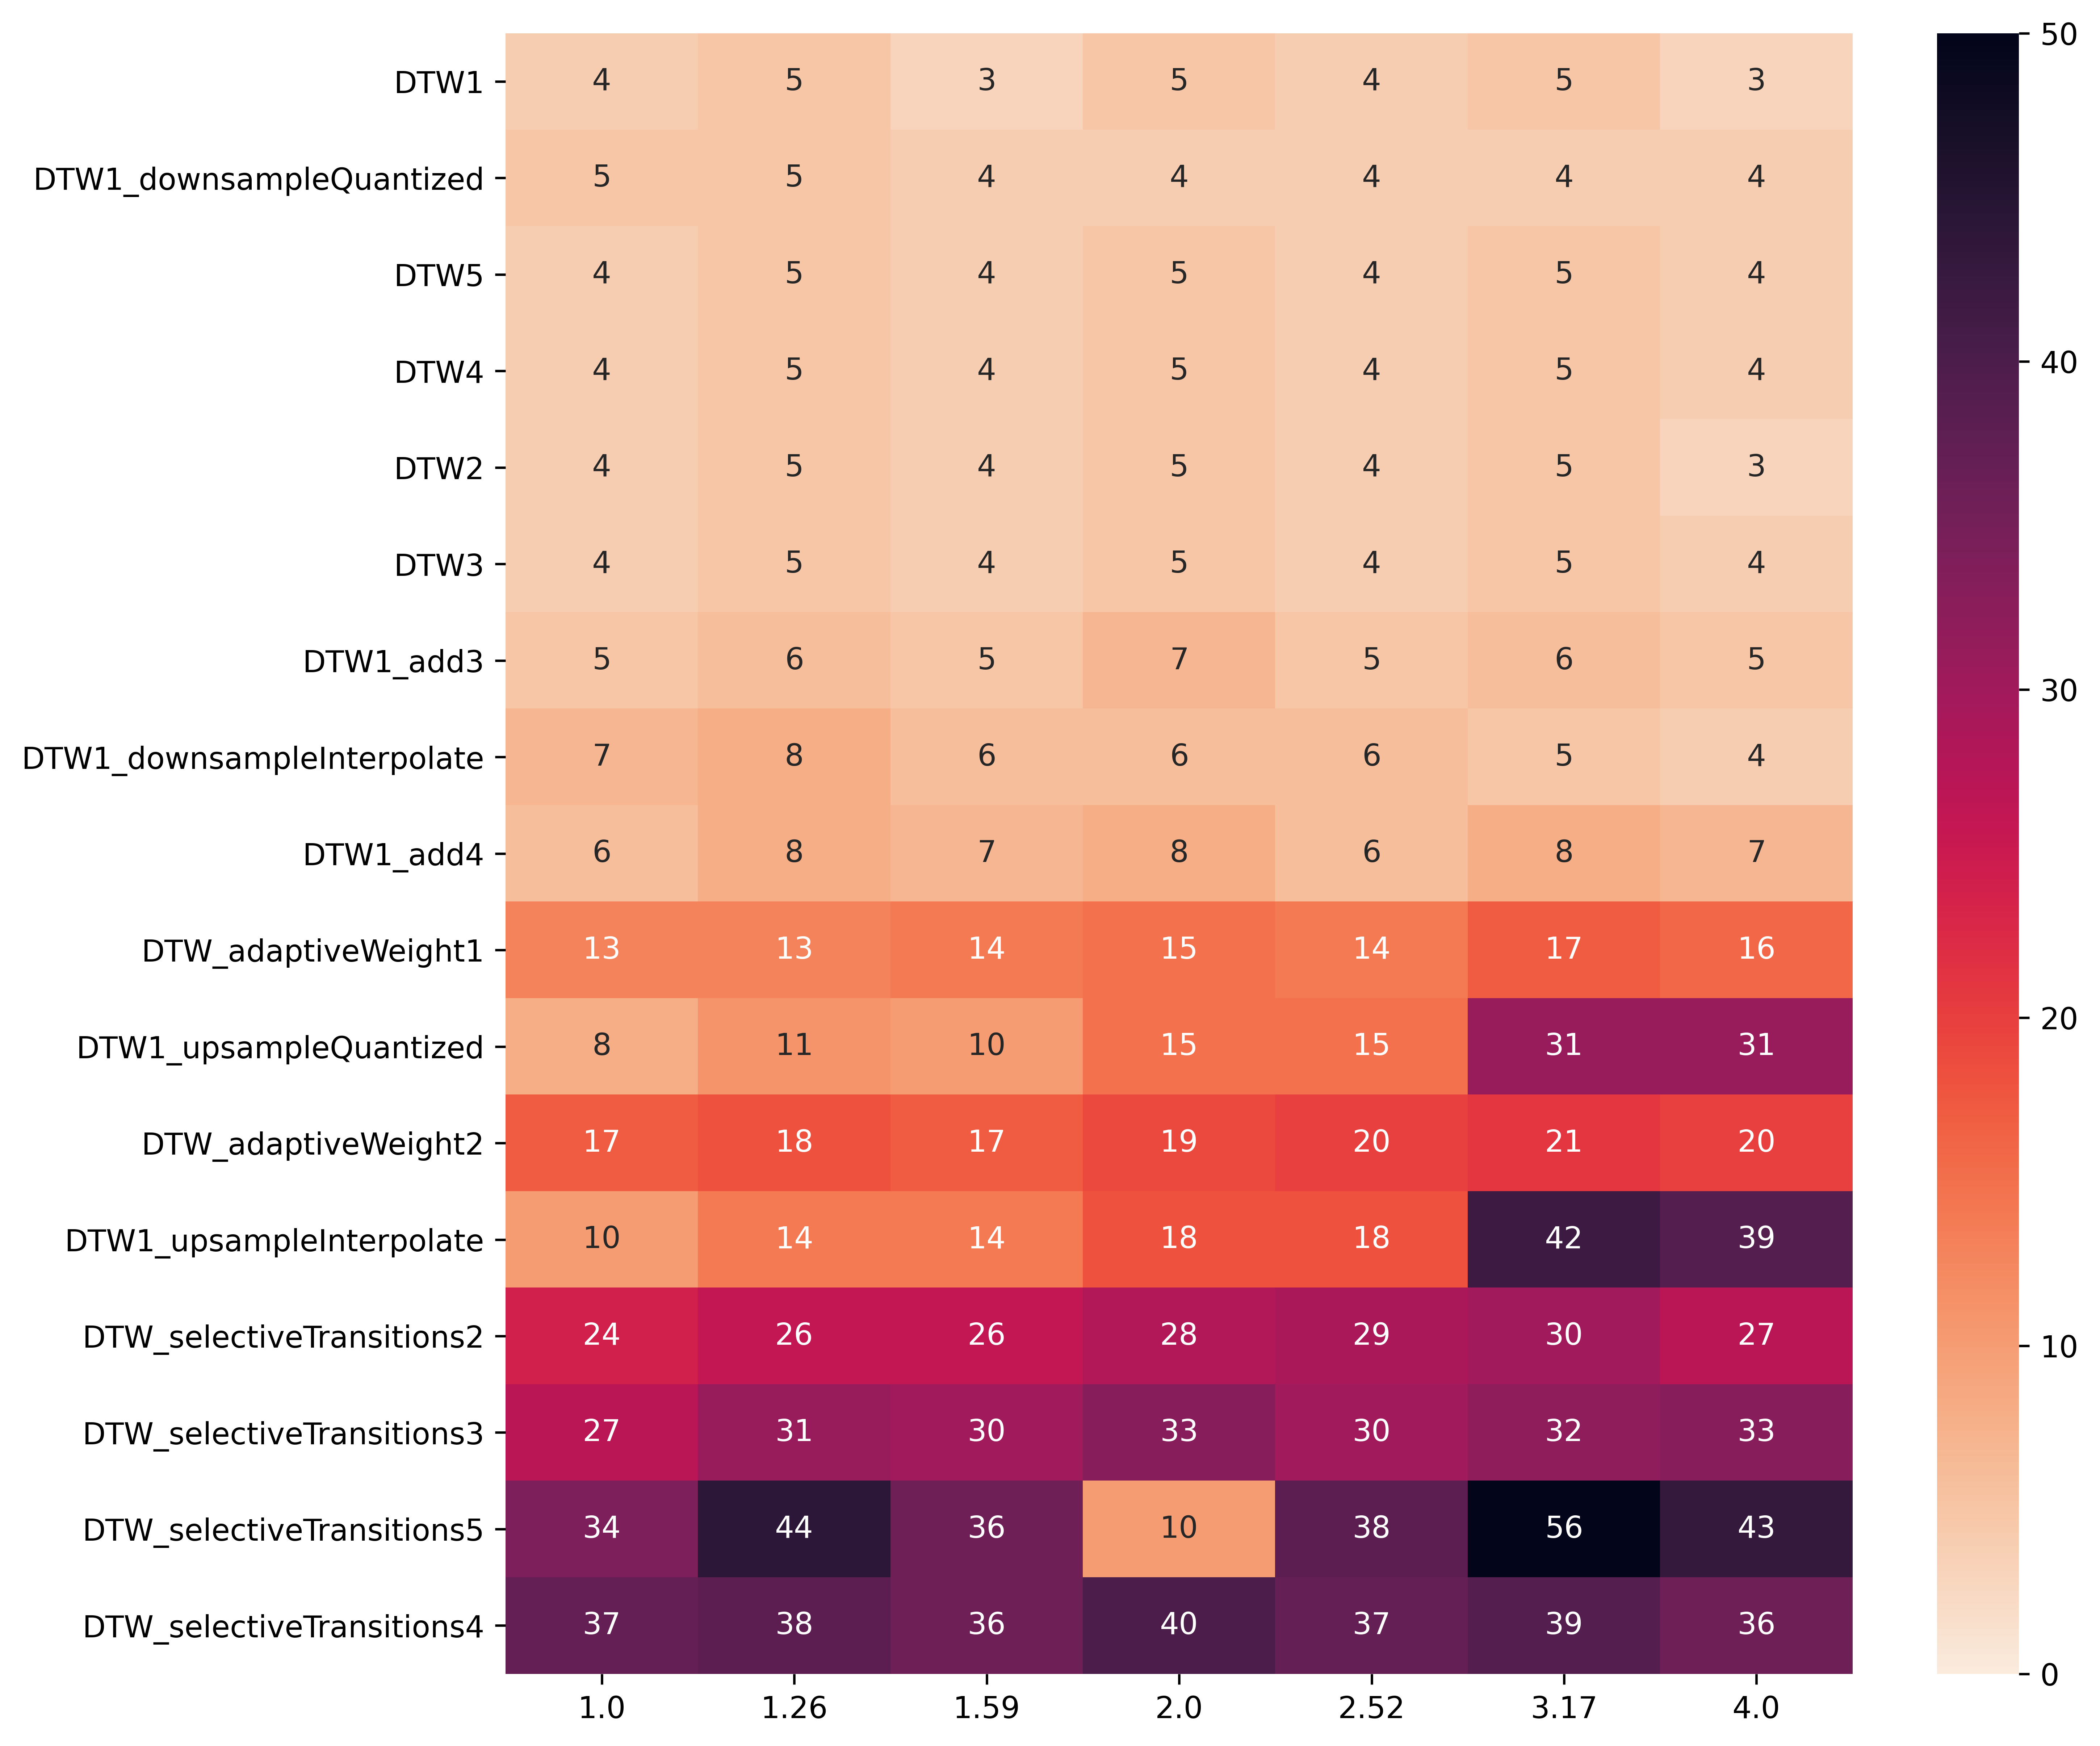

In [67]:
import seaborn as sns
from matplotlib import pyplot
pyplot.figure(figsize=(10, 10), dpi=600)
sns.heatmap(df, annot=True, cmap = sns.cm.rocket_r, vmin=0, vmax=50)